In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
wide_df = pd.read_csv('wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('long_data.csv', usecols=['date', 'datatype', 'value'], parse_dates=['date'])[['date', 'datatype', 'value']]

In [3]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [4]:
wide_df.describe(include='all', datetime_is_numeric=True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


Text(0, 0.5, 'Temperature in Celsius')

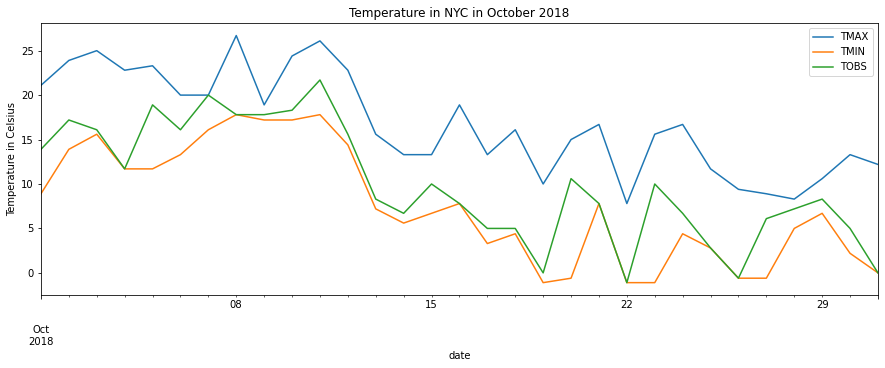

In [5]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')



In [6]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


In [7]:
long_df.describe(include='all', datetime_is_numeric=True)

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


Text(0.5, 1.0, 'Temperature in NYC in October 2018')

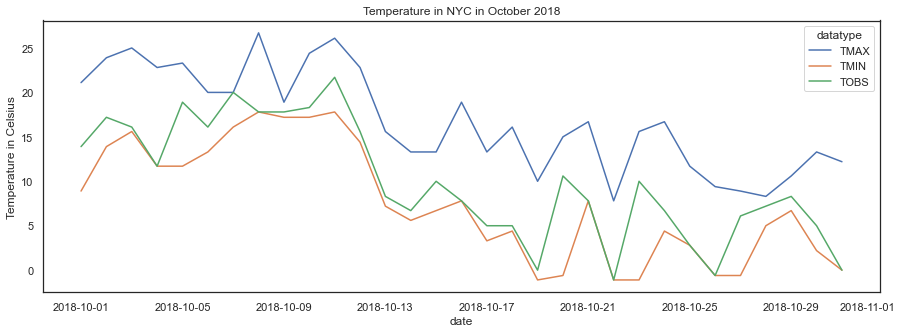

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 5)}, style='white')
ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')

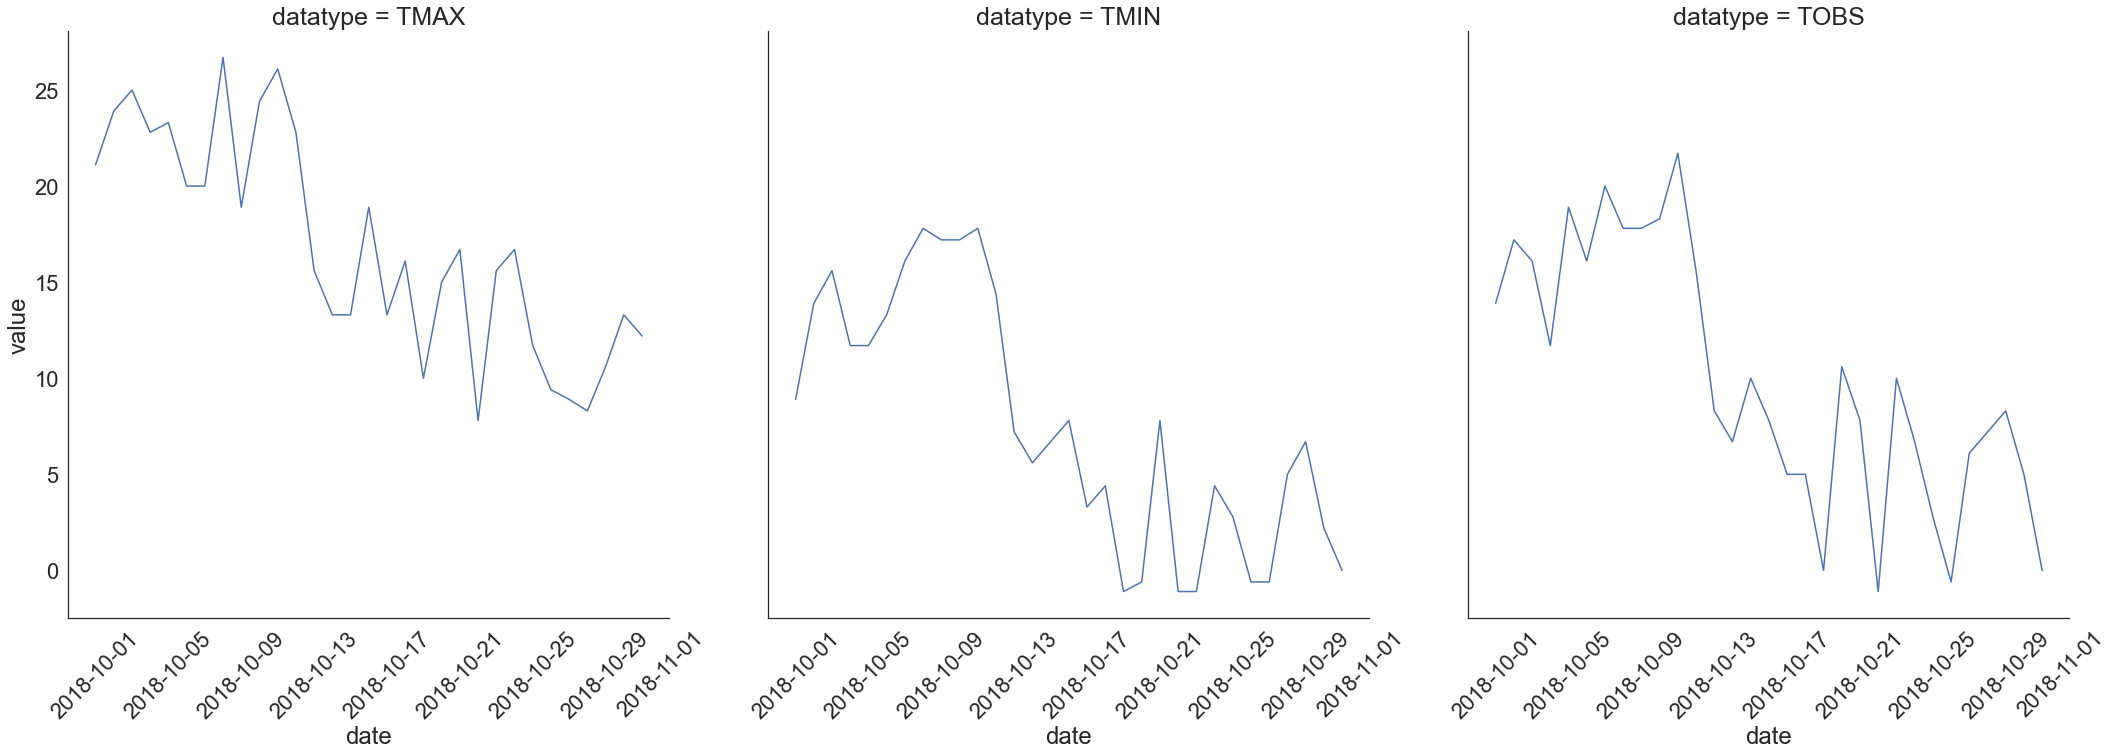

In [9]:
sns.set(
    rc={'figure.figsize': (20, 10)},
    style='white', font_scale=2
)
g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)


In [10]:
import requests

def make_request(endpoint, payload=None):
    return requests.get(
        'https://www.ncdc.noaa.gov/cdo-web/'
        f'api/v2/{endpoint}',
        headers={'token': APIKEY},
        params=payload
    )

In [11]:
response = make_request('datasets', {'startdate': '2018-10-01'})

In [12]:
response.status_code

200

In [13]:
response.ok

True

In [14]:
payload = response.json()
payload.keys()

dict_keys(['metadata', 'results'])

In [15]:
payload['metadata']

{'resultset': {'offset': 1, 'count': 11, 'limit': 25}}

In [16]:
payload['results'][0].keys()

dict_keys(['uid', 'mindate', 'maxdate', 'name', 'datacoverage', 'id'])

In [17]:
[(data['id'], data['name']) for data in payload['results']]

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

In [18]:
response = make_request(
    'datacategories', payload={'datasetid': 'GHCND'}
)
response.status_code

200

In [19]:
response.json()['results']

[{'name': 'Evaporation', 'id': 'EVAP'},
 {'name': 'Land', 'id': 'LAND'},
 {'name': 'Precipitation', 'id': 'PRCP'},
 {'name': 'Sky cover & clouds', 'id': 'SKY'},
 {'name': 'Sunshine', 'id': 'SUN'},
 {'name': 'Air Temperature', 'id': 'TEMP'},
 {'name': 'Water', 'id': 'WATER'},
 {'name': 'Wind', 'id': 'WIND'},
 {'name': 'Weather Type', 'id': 'WXTYPE'}]

In [20]:
response = make_request(
    'datatypes', 
    payload={'datacategoryid': 'TEMP', 'limit': 100}
)
response.status_code

200

In [21]:
[(datatype['id'], datatype['name']) for datatype in response.json()['results']]

[('CDSD', 'Cooling Degree Days Season to Date'),
 ('DATN',
  'Number of days included in the multiday minimum temperature (MDTN)'),
 ('DATX',
  'Number of days included in the multiday maximum temperature (MDTX)'),
 ('DLY-DUTR-NORMAL', 'Long-term averages of daily diurnal temperature range'),
 ('DLY-DUTR-STDDEV',
  'Long-term standard deviations of daily diurnal temperature range'),
 ('DLY-TAVG-NORMAL', 'Long-term averages of daily average temperature'),
 ('DLY-TAVG-STDDEV',
  'Long-term standard deviations of daily average temperature'),
 ('DLY-TMAX-NORMAL', 'Long-term averages of daily maximum temperature'),
 ('DLY-TMAX-STDDEV',
  'Long-term standard deviations of daily maximum temperature'),
 ('DLY-TMIN-NORMAL', 'Long-term averages of daily minimum temperature'),
 ('DLY-TMIN-STDDEV',
  'Long-term standard deviations of daily minimum temperature'),
 ('EMNT', 'Extreme minimum temperature for the period.'),
 ('EMXT', 'Extreme maximum temperature for the period.'),
 ('HDSD', 'Heating De

In [22]:
response = make_request(
    'locationcategories', payload={'datasetid': 'GHCND'}
)
response.status_code

200

In [23]:
import pprint
pprint.pprint(response.json())

{'metadata': {'resultset': {'count': 12, 'limit': 25, 'offset': 1}},
 'results': [{'id': 'CITY', 'name': 'City'},
             {'id': 'CLIM_DIV', 'name': 'Climate Division'},
             {'id': 'CLIM_REG', 'name': 'Climate Region'},
             {'id': 'CNTRY', 'name': 'Country'},
             {'id': 'CNTY', 'name': 'County'},
             {'id': 'HYD_ACC', 'name': 'Hydrologic Accounting Unit'},
             {'id': 'HYD_CAT', 'name': 'Hydrologic Cataloging Unit'},
             {'id': 'HYD_REG', 'name': 'Hydrologic Region'},
             {'id': 'HYD_SUB', 'name': 'Hydrologic Subregion'},
             {'id': 'ST', 'name': 'State'},
             {'id': 'US_TERR', 'name': 'US Territory'},
             {'id': 'ZIP', 'name': 'Zip Code'}]}


In [24]:
def get_item(name, what, endpoint, start=1, end=None):
    mid = (start + (end or 1))//2
    name = name.lower()
    payload={
        'datasetid': 'GHCND', 'sortfield': 'name',
        'offset': mid,
        'limit': 1
    }
    response = make_request(endpoint, {**payload, **what})

    if response.ok:
        payload = response.json()
        end = end or payload['metadata']['resultset']['count']

        current_name = payload['results'][0]['name'].lower()

        if name in current_name:
            return payload['results'][0]
        else:
            if start >= end:
                return {}
            elif name < current_name:
                return get_item(name, what, endpoint, start, mid-1)
            elif name > current_name:
                return get_item(name, what, endpoint, mid+1, end)
            else:
                print('Response not OK ',
                    f'status: {response.status_code}')


In [25]:
nyc = get_item(
        'New York', {'locationcategoryid': 'CITY'}, 'locations')
nyc

{'mindate': '1869-01-01',
 'maxdate': '2022-07-28',
 'name': 'New York, NY US',
 'datacoverage': 1,
 'id': 'CITY:US360019'}

In [26]:
central_park = get_item(
    'NY City Central Park',
    {'locationid': nyc['id']}, 'stations'
)
central_park

{'elevation': 42.7,
 'mindate': '1869-01-01',
 'maxdate': '2022-07-26',
 'latitude': 40.77898,
 'name': 'NY CITY CENTRAL PARK, NY US',
 'datacoverage': 1,
 'id': 'GHCND:USW00094728',
 'elevationUnit': 'METERS',
 'longitude': -73.96925}

In [27]:
response = make_request(
    'data', 
    {'datasetid': 'GHCND',
     'stationid': central_park['id'],
     'locationid': nyc['id'],
     'startdate': '2018-10-01',
     'enddate': '2018-10-31',
     'datatypeid': ['TAVG', 'TMAX', 'TMIN'],
     'units': 'metric',
     'limit': 1000}
)
response.status_code

200

In [28]:
df = pd.DataFrame(response.json()['results'])
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TMAX,GHCND:USW00094728,",,W,2400",24.4
1,2018-10-01T00:00:00,TMIN,GHCND:USW00094728,",,W,2400",17.2
2,2018-10-02T00:00:00,TMAX,GHCND:USW00094728,",,W,2400",25.0
3,2018-10-02T00:00:00,TMIN,GHCND:USW00094728,",,W,2400",18.3
4,2018-10-03T00:00:00,TMAX,GHCND:USW00094728,",,W,2400",23.3


In [29]:
df.datatype.unique()

array(['TMAX', 'TMIN'], dtype=object)

In [30]:
if get_item(
    'NYC City Central Park',
    {'locationid': nyc['id'], 'datatypeid': 'TAVG'}, 'stations'
):
    print("Found!")

In [31]:
df = pd.read_csv('nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [32]:
df.rename(
    columns={'value': 'temp_C', 'attributes': 'flags'}, inplace=True
)

In [33]:
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

In [34]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [35]:
df.loc[:, 'date'] = pd.to_datetime(df.date)
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [36]:
df.date.describe(datetime_is_numeric=True)

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: date, dtype: object

In [37]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

In [38]:
eastern = pd.read_csv(
    'nyc_temperatures.csv',
    index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [39]:
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [40]:
eastern.tz_convert(None).to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

In [41]:
eastern.tz_convert(None).to_period('M').to_timestamp().index

DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

In [42]:
df = pd.read_csv('nyc_temperatures.csv').rename(columns={'value': 'temp_C', 'attributes': 'flags'})

In [43]:
new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9/5) + 32
)

In [44]:
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [45]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


In [46]:
df = df.assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_C_whole = lambda x: x.temp_C.astype('int'),
    temp_F=lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole=lambda x: x.temp_F.astype('int')
)
df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [47]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)

In [48]:
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int32
temp_F                 float64
temp_F_whole             int32
dtype: object

In [49]:
df_with_categories.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


In [50]:
pd.Categorical(
    ['med', 'med', 'low', 'high'],
    categories=['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

In [51]:
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [52]:
df[df.datatype == 'TMAX'].sort_values(
    by=['temp_C', 'date'], ascending=[False, True]
).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [53]:
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
18,2018-10-07,TAVG,GHCND:USW00014732,"H,,S,",22.8,22,73.04,73
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
21,2018-10-08,TAVG,GHCND:USW00014732,"H,,S,",20.9,20,69.62,69
12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


In [54]:
print(df.sample(5, random_state=0).index)
print(df.sample(5, random_state=0).sort_index().index)

Int64Index([2, 30, 55, 16, 13], dtype='int64')
Int64Index([2, 13, 16, 30, 55], dtype='int64')


In [55]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


In [56]:
print(df.equals(df.sort_values(by='temp_C')))
print(df.equals(df.sort_values(by='temp_C')).sort_index()) # throws an error

False


AttributeError: 'bool' object has no attribute 'sort_index'

In [57]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [58]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [59]:
df['2018-10-11':'2018-10-12'].reset_index()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
1,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
3,2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
4,2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
5,2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [60]:
sp = pd.read_csv('sp500.csv', index_col='date', parse_dates=True).drop(columns=['adj_close'])

In [61]:
sp.head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [62]:
bitcoin = pd.read_csv('bitcoin.csv', index_col='date', parse_dates=True).drop(columns=['market_cap'])

In [63]:
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(level='date').sum()
portfolio.head(10).assign(day_of_week= lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


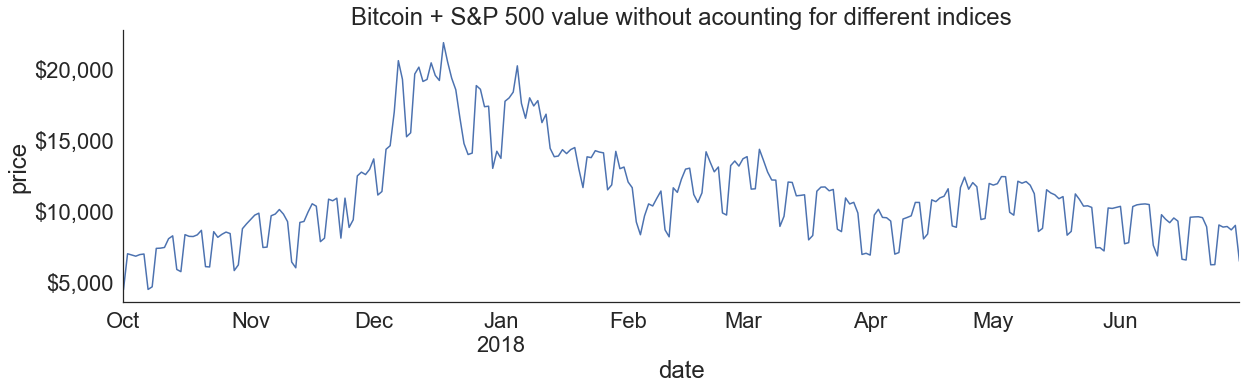

In [64]:
from matplotlib.ticker import StrMethodFormatter
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(20, 5), legend=False, 
    title='Bitcoin + S&P 500 value without acounting for different indices'
)

ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

In [65]:
sp.reindex(bitcoin.index, method='ffill').head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [66]:
import numpy as np
sp_reindexed = sp.reindex(bitcoin.index).assign(
    volume = lambda x: x.volume.fillna(0),
    close = lambda x: x.close.fillna(method='ffill'),
    open = lambda x: np.where(x.open.isnull(), x.close, x.open), 
    high = lambda x: np.where(x.high.isnull(), x.close, x.high),
    low = lambda x: np.where(x.low.isnull(), x.close, x.low)
)

In [67]:
sp_reindexed.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [68]:
fixed_portfolio = sp_reindexed + bitcoin

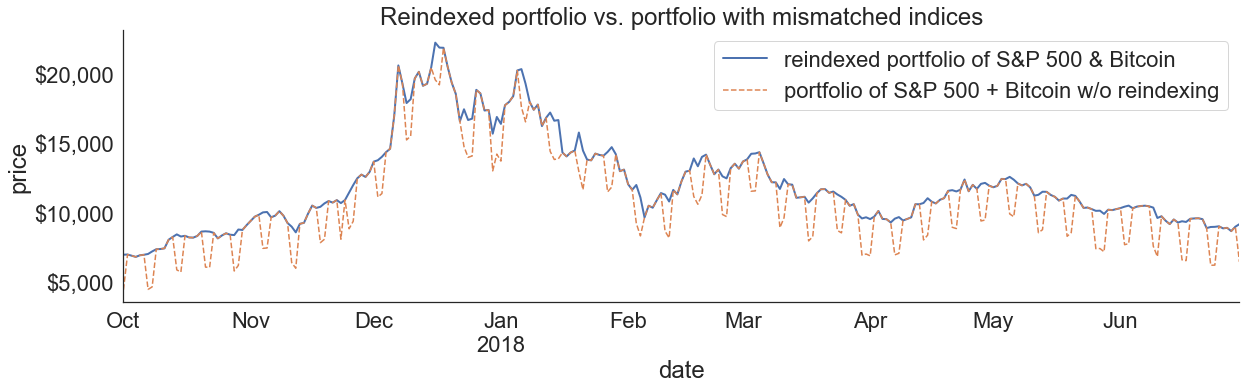

In [69]:
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(20, 5), linewidth = 2,
    label='reindexed portfolio of S&P 500 & Bitcoin',
    title='Reindexed portfolio vs. portfolio with mismatched indices'
)

portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--',
    label='portfolio of S&P 500 + Bitcoin w/o reindexing'
)

ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

In [70]:
long_df = pd.read_csv('long_data.csv', usecols=['date', 'datatype', 'value']).rename(columns={'value': 'temp_C'}).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)

In [71]:
long_df.set_index('date').head(6).T

date,2018-10-01,2018-10-01,2018-10-01,2018-10-02,2018-10-02,2018-10-02
datatype,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS
temp_C,21.1,8.9,13.9,23.9,13.9,17.2
temp_F,69.98,48.02,57.02,75.02,57.02,62.96


In [72]:
pivoted_df = long_df.pivot(index='date', columns='datatype', values='temp_C')
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [73]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


In [74]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype',
    values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [75]:
pivoted_df['temp_F']['TMIN'].head()

date
2018-10-01    48.02
2018-10-02    57.02
2018-10-03    60.08
2018-10-04    53.06
2018-10-05    53.06
Name: TMIN, dtype: float64

In [76]:
multi_index_df = long_df.set_index(['date', 'datatype'])
print(multi_index_df.head().index)
print(multi_index_df.head())

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', 'datatype'])
                     temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02


In [77]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [78]:
extra_data = long_df.append([{
    'datatype': 'TAVG',
    'date': '2018-10-01',
    'temp_C': 10,
    'temp_F': 50
}]).set_index(['date', 'datatype']).sort_index()

print(extra_data['2018-10-01':'2018-10-02'])
print(extra_data.unstack().head())
print(extra_data.unstack(fill_value = -40).head())

                     temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96
           temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02    NaN  23.9  13.9  17.2    NaN  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06
2018-10-05    NaN  23.3  11.7  18.9    NaN  73.94  53.06  66.02
           temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_12180\882698506.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = long_df.append([{
C:\Users\KSpicer\AppData\Local\Temp\ipykernel_12180\882698506.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  extra_data = long_df.append([{


In [79]:
wide_df = pd.read_csv('wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [80]:
melted_df = wide_df.melt(
    id_vars='date', value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C', var_name='measurement'
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [81]:
wide_df.set_index('date', inplace=True)
stacked_series = wide_df.stack()
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

In [82]:
stacked_df = stacked_series.to_frame('values')
stacked_df.head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

In [83]:
stacked_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', None])

In [84]:
stacked_df.index.set_names(['date', 'datatype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datatype'])

In [85]:
df = pd.read_csv('dirty_data.csv')
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [86]:
df.describe()

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [89]:
contain_nulls = df[
    df.SNOW.isna() | df.SNWD.isna() | df.TOBS.isna() | df.WESF.isna() | df.inclement_weather.isna()
]
print(contain_nulls.shape[0])
print(contain_nulls.head(10))

765
                  date            station  PRCP   SNOW  SNWD    TMAX  TMIN  \
0  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
1  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
2  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
3  2018-01-02T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -8.3 -16.1   
4  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
5  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
6  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
7  2018-01-04T00:00:00                  ?  20.6  229.0   inf  5505.0 -40.0   
8  2018-01-04T00:00:00                  ?  20.6  229.0   inf  5505.0 -40.0   
9  2018-01-05T00:00:00                  ?   0.3    NaN   NaN  5505.0 -40.0   

   TOBS  WESF inclement_weather  
0   NaN   NaN               NaN  
1   NaN   NaN               NaN  
2   NaN   NaN               NaN  
3

In [91]:
df[df.inclement_weather == 'NaN'].shape[0] # won't work
df[df.inclement_weather == 'np.nan'].shape[0] # also doesn't work
df[df.inclement_weather.isna()].shape[0] # this one will work

357

In [92]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

In [95]:
def get_inf_count(df):
    return {
        col: df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
    }

In [96]:
get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [97]:
pd.DataFrame({
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [98]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


In [101]:
print(df[df.duplicated()].shape[0])
print(df[df.duplicated(keep=False)].shape[0])

284
482


In [103]:
print(df[df.duplicated(['date', 'station'])].shape[0])
print(df[df.duplicated()].head())

284
                  date            station  PRCP   SNOW  SNWD    TMAX  TMIN  \
1  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
2  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
5  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
6  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
8  2018-01-04T00:00:00                  ?  20.6  229.0   inf  5505.0 -40.0   

   TOBS  WESF inclement_weather  
1   NaN   NaN               NaN  
2   NaN   NaN               NaN  
5 -13.3   NaN             False  
6 -13.3   NaN             False  
8   NaN  19.3              True  


In [105]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

In [106]:
df.sort_values('station', ascending=False, inplace=True)

In [114]:
station_qm_wesf = df[df.station=='?'].drop_duplicates('date').set_index('date').WESF
df_deduped = df.drop_duplicates('date')
df_deduped = df_deduped.drop(columns='station').set_index('date').sort_index()
df_deduped = df_deduped.assign(WESF=lambda x: x.WESF.combine_first(station_qm_wesf))

In [115]:
print(df_deduped.shape)
print(df_deduped.head())

(324, 8)
                     PRCP   SNOW  SNWD    TMAX  TMIN  TOBS  WESF  \
date                                                               
2018-01-01T00:00:00   0.0    0.0  -inf  5505.0 -40.0   NaN   NaN   
2018-01-02T00:00:00   0.0    0.0  -inf    -8.3 -16.1 -12.2   NaN   
2018-01-03T00:00:00   0.0    0.0  -inf    -4.4 -13.9 -13.3   NaN   
2018-01-04T00:00:00  20.6  229.0   inf  5505.0 -40.0   NaN  19.3   
2018-01-05T00:00:00  14.2  127.0   inf    -4.4 -13.9 -13.9   NaN   

                    inclement_weather  
date                                   
2018-01-01T00:00:00               NaN  
2018-01-02T00:00:00             False  
2018-01-03T00:00:00             False  
2018-01-04T00:00:00              True  
2018-01-05T00:00:00              True  


In [117]:
print(df_deduped.dropna().shape)
print(df_deduped.dropna(how='all').shape)

(4, 8)
(324, 8)


In [120]:
df_deduped.dropna(
    how='all', subset=['inclement_weather', 'SNOW', 'SNWD']).shape


(293, 8)

In [122]:
df_deduped.dropna(
    axis='columns', 
    thresh=df_deduped.shape[0] * .75
).columns

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS', 'inclement_weather'], dtype='object')

In [123]:
df_deduped.loc[:, 'WESF'].fillna(0, inplace=True)
df_deduped.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,0.0,NaN
2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


In [125]:
df_deduped = df_deduped.assign(
    TMAX=lambda x: x.TMAX.replace(5505, np.nan),
    TMIN=lambda x: x.TMIN.replace(-40, np.nan)
)

In [126]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'),
    TMIN=lambda x: x.TMIN.fillna(method='ffill')
    ).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04T00:00:00,20.6,229.0,inf,-4.4,-13.9,NaN,19.3,True
2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


In [127]:
df_deduped.assign(
    SNWD=lambda x: np.nan_to_num(x.SNWD)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-1.797693e+308,NaN,NaN,NaN,0.0,NaN
2018-01-02T00:00:00,0.0,0.0,-1.797693e+308,-8.3,-16.1,-12.2,0.0,False
2018-01-03T00:00:00,0.0,0.0,-1.797693e+308,-4.4,-13.9,-13.3,0.0,False
2018-01-04T00:00:00,20.6,229.0,1.797693e+308,NaN,NaN,NaN,19.3,True
2018-01-05T00:00:00,14.2,127.0,1.797693e+308,-4.4,-13.9,-13.9,0.0,True


In [128]:
df_deduped.assign(
    SNWD=lambda x: x.SNWD.clip(0, x.SNOW)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2018-01-02T00:00:00,0.0,0.0,0.0,-8.3,-16.1,-12.2,0.0,False
2018-01-03T00:00:00,0.0,0.0,0.0,-4.4,-13.9,-13.3,0.0,False
2018-01-04T00:00:00,20.6,229.0,229.0,NaN,NaN,NaN,19.3,True
2018-01-05T00:00:00,14.2,127.0,127.0,-4.4,-13.9,-13.9,0.0,True


In [129]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(x.TMAX.median()),
    TMIN=lambda x: x.TMIN.fillna(x.TMIN.median()),
    # average of TMAX and TMIN
    TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
    ).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,14.4,5.6,10.0,0.0,NaN
2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04T00:00:00,20.6,229.0,inf,14.4,5.6,10.0,19.3,True
2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


In [130]:
df_deduped.apply(lambda x: x.fillna(x.rolling(7, min_periods=0).median())).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02T00:00:00,0.0,0.0,-inf,-8.30,-16.1,-12.20,0.0,False
2018-01-03T00:00:00,0.0,0.0,-inf,-4.40,-13.9,-13.30,0.0,False
2018-01-04T00:00:00,20.6,229.0,inf,-6.35,-15.0,-12.75,19.3,True
2018-01-05T00:00:00,14.2,127.0,inf,-4.40,-13.9,-13.90,0.0,True


In [131]:
df_deduped.reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D')).apply(lambda x: x.interpolate()).head(10)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
